* 챗봇의 5가지 대표 유형
1. 대화형 챗봇
2. 트리형(버튼) 챗봇
3. 추천형 챗봇
4. 시나리오형 챗봇
5. 결합형 챗봇

트랜스포머 모델을 기반으로 한 인코더-디코더 구조를 바탕으로 챗봇을 제작

* 트랜스포머와 인코더 디코더
    * Transformer의 구조
        * 인코더 층 N개와 디코더 층 N개 
        * 인코더 층에는 2개의 sublayer - 멀티헤드 셀프 어텐션과 피드포워드 신경망 <br>
        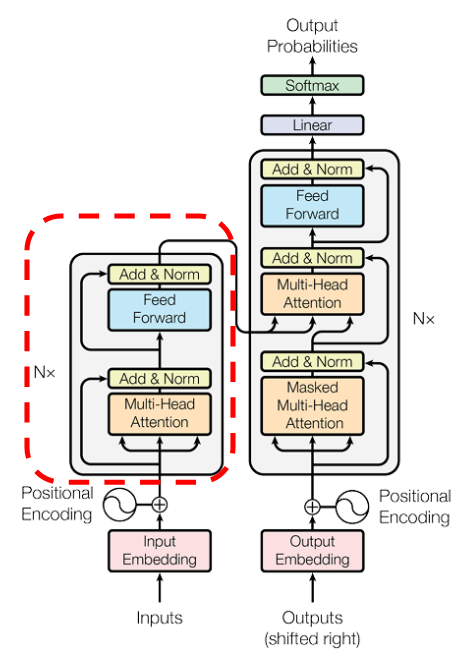 <br>
        * 멀티헤드 셀프 어텐션과 피드포워드신경망을 N번 통과한 후, 디코더층으로 계산 결과를 보냄
        * 디코더 층에는 3개의 sublayer - masked multihead attention, multihead attention,그리고 피드포워드 신경망
        * 이 3개의 sublayer를 N번 통과 후 계산 결과 출력<br>
        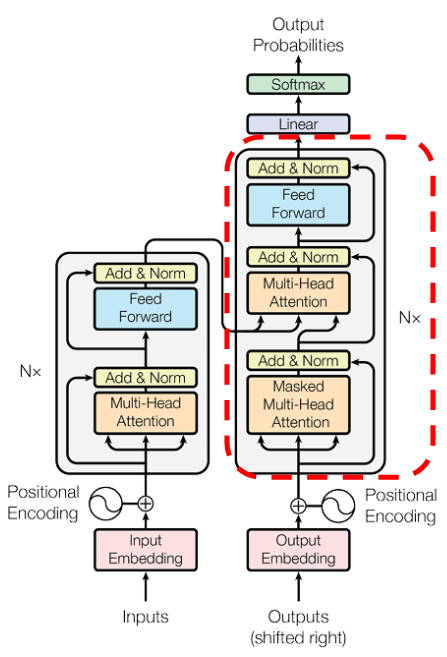<br>
        * 인코더 층/ 디코더 층에 임베딩 출력을 입력하기 전에 Positional Encoding을 합쳐야함<br>
        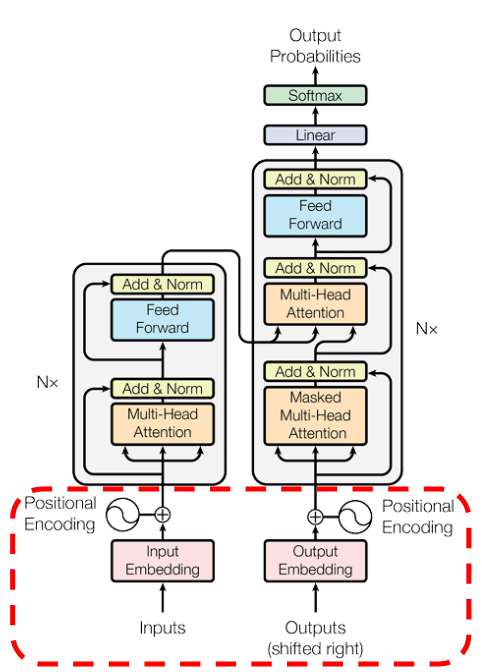<br>
    * Encoder & Decoder
        * 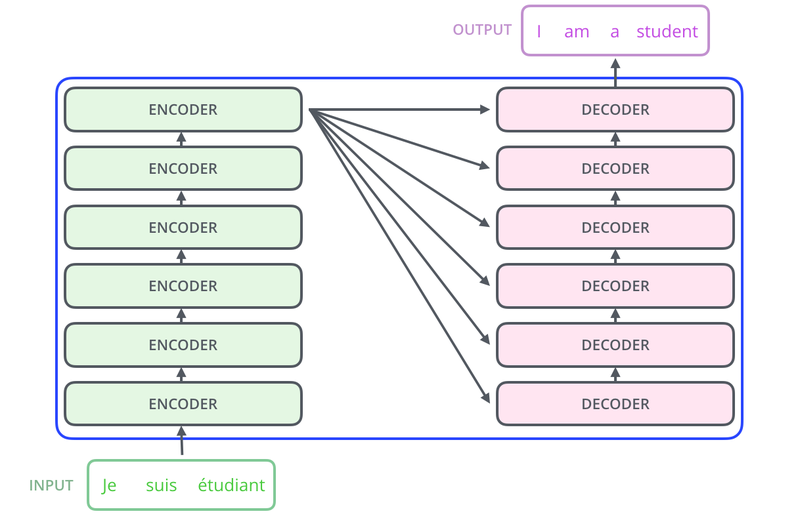<br>
            초록색 도형을 인코더 층, 핑크색 도형을 디코더층이라고 하면, 입력 문장은 누적해서 쌓아 올린 인코더층을 통해 정보를 뽑아내고, 디코더는 누적해 쌓아 올린 디코더의 층을 통해서 출력 문장의 단어를 하나씩 만들어가는 구조.
    * positional encoding
        * 트랜스 포머는 입력을 받을때, 문장에 있는 단어들을 한번에 받기 때문에, 모델에게 어순 정보를 알려줘야만 한다. 따라서 단어의 임베딩 벡터에다가 위치 정보를 가진 벡터값을 더해서 모델의 입력으로 삼는 것.
        * 사인 함수와 코사인 함수의 값을 임베딩 벡터에 더해줌으로써 단어의 순서 정보를 더해 준다. (이유: 코사인과 사인함수는 연속성과 주기성을 가지기때문에 단어의 위치도 주기성과 연속성을 표현하기에 적합하기때문이다. 또한 효율적으로 저장공간을 사용할 수 있고 위치 정보 정리도 효율적으로 할 수 있다. 또한 sine과 cosine함수는 수적으로 잘 정의된 함수이다보니 다양한 최적화 알고리즘으로써 매우 유용함)
        * 임베딩 벡터가 모여 만들어진 문장 벡터 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어짐.
        * d_model: 임베딩 벡터의 차원
        * pos: 입력 문장에서의 임베딩 벡터의 위치
* 어텐션? 어텐션!
    * 어텐션이란?<br>
        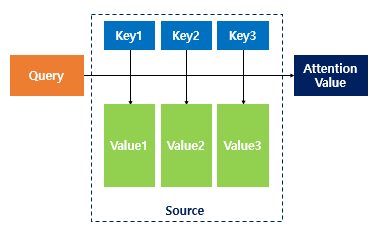<br>
        * 쿼리(query)에 대해 모든 키(key)와의 유사도를 각각 구하는 함수
        * 이 유사도를 키와 맵핑되어있는 각각의 값(value)에 반영함 그리고 유사도가 반영된 값(value)를 모두 더해서 뭉쳐주면 최종적인 어텐션 값(Attention Value)가 나옴
        
    * Transformer 속 Attention<br>
        Query, Key, Value는 기본적으로 단어 정보를 함축한 벡터.<br>
        단어벡터란 초기 입력으로 사용된 임베딩 벡터가 아닌 트랜스 포머의 여러 연산을 거친 후의 단어 벡터.<br>
        * Encoder Self Attention (Self Attention)<br>
            인코더의 입력으로 들어간 문장 내의 단어들이 서로 유사도를 구함<br>
            * 유사도를 구하는 대상이 현재 문장 내의 단어들이 서로 유사도를 구하는 경우 -> 유사도를 어떻게 구해요? Scaled dot Product Attention
        * Decoder Self Attention (Masked Decoder Self Attention)<br>
            단어를 1개씩 생성하는 디코더가 이미 생성된 앞 단어들과의 유사도를 구함
        * Encoder-Decoder Attention (Multi-head attention)<br>
            디코더가 잘 예측하기 위해서 인코더에 입력된 단어들과 유사도를 구함.
    * 스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention)
        * 단어들 간의 유사도를 구하는 방법.
        * Query에 대해서 모든 key와의 유사도를 각각 구함. 그리고 구해낸 이 유사도를 키와 맵핑되어있는 각각의 Value에 반영해줌. 그리고 유사도가 반영된 Value를 모두 더해서 뭉쳐주면 어텐션 값이 나옴.
        * Q, K, V는 단어 벡터를 행으로 하는 문장 행렬이다
        * 벡터의 내적 (dot product)는 벡터의 유사도를 의미함.
        * 특정값을 분모로 사용하는 것은 값의 크기를 조절하는 Scaling을 위함이다. <br>
            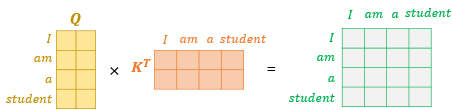<br>
            예를 들어 초록색 행렬의 'I'행과 'student'열의 값은 Q 행렬에 있던 'I'와 'K'행렬에 있던 'student'벡터의 내적값을 의미한다. 결국 각 단어 벡터의 유사도가 모두 기록된 유사도 행렬이 되는 것. <br>
            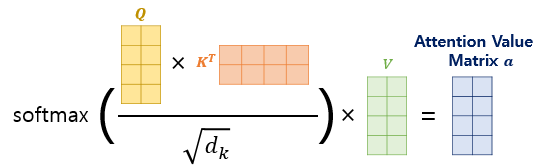<br>
            이 유사도 값을 스케일링 해주기 위해서 행렬 전체를 특정 값으로 나눠주고 유사도를 0과 1사이의 값으로 Normalize해주기 위해서 소프트 맥스 함수를 사용함. 여기까지가 Q와 K의 유사도를 구하는 과정. 여기에 문장행렬 V와 곱하면 어텐션 값을 얻음.<br>
            만약 분모에 특정 값을 나눠주는 부분을 사용하지 않는다면 dot product attention이라고 부름. 나누어주는 이유는? <br>
            스케일링을 하지 않으면 벡터의 내적 연산의 결과가 입력 벡터의 차원 수에 따라 크기가 매우 커지게 되고, softmax의 출력값이 작아지는 것을 방지하기 위해서이다. softmax의 출력값이 작아지면 역전파 과정에서 기울기 소실 문제가 발생할 수 있음.<br>
        
    * 머리가 여러 개인 어텐션 (Multihead Attention, Encoder-Decoder Attention)
        * 백지장도 맞들면 낫다라는 말이 있듯이 여러개의 똑똑한 머리를 사용하면 더 나은 결과를 이뤄낼 수 있음 이러한 개념을 multi-head attention에서 사용한 것이라고 보면 됨.
        * 트랜스포머에 num_heads라는 변수는 기계가 몇 개의 똑똑한 머리를 사용할지 결정하는 하이퍼파라미터임. 즉, 병렬적으로 몇개의 어텐션 연산을 수행할지를 결정하는 하이퍼 파라미터.
        * Positional Encoding에서 가졌던 임베딩 벡터의 차원과 문장의 길이를 이용하여 문장의 길이를 행으로 임베딩 벡터의 차원을 열로 가짐.
        * 입력된 문장 행렬을 num_heads의 수만큼 쪼개서 어텐션을 수행하고, 이렇게 얻은 num_heads의 개수만큼의 어텐션 값 행렬을 다시 하나로 concatenate함. 그렇게함으로써 열의 크기가 임베딩 벡터의 차원의 수만큼 늘어남.
        * 만약 nums_head가 8이라면 8개의 머리를 사용하는 것인데, 이는 8개의 각각 다른 관점에서 어텐션을 수행하므로 한 번의 어텐션만 수행했다면 놓칠 수도 있던 정보를 캐치할 수 있음.
    * 마스킹
        * Padding Masking
            * 패딩 자체는 모든 문장의 길이를 동일하게 해주는 과정에서 정해준 길이보다 짧은 문장의 경우에 숫자 0을 채워서 문장의 길이를 맞춰주는 전처리 방법이다.
            * 주어진 숫자 0은 실제 의미가 있는 단어가 아니므로 실제 어텐션 등과 같은 연산에서는 제외할 필요가 있음. 따라서 패딩 마스킹은 이를 위해 숫자 0인 위치를 체크함.
        * Look-ahead Masking, 다음 단어 가리기
            * RNN은 순서대로 단어가 들어가지만 트랜스포머는 모든 단어가 한번에 들어가기때문에 추가적인 마스킹이 필요함.
            * 이전 단어들로부터 다음 단어를 예측하는 훈련을 제대로 하는 것이기때문에 자신보다 다음에 나올 단어를 참고하지 않도록 가리는 기법을 사용해야함.
* 인코더
    * 셀프어텐션과 피드포워드로 구성. 그리고 셀프어텐션은 멀테 헤드 어텐션으로 병렬적으로 이루어짐.
* 디코더
    * 셀프어텐션, 인코더-디코더 어텐션, 피드포워드 신경망으로 구성
    * 인코더 디코더 어텐션은 Query가 디코더의 벡터이지만 Key와 Value가 인코더의 벡터라는 특징이 있음.<br>
        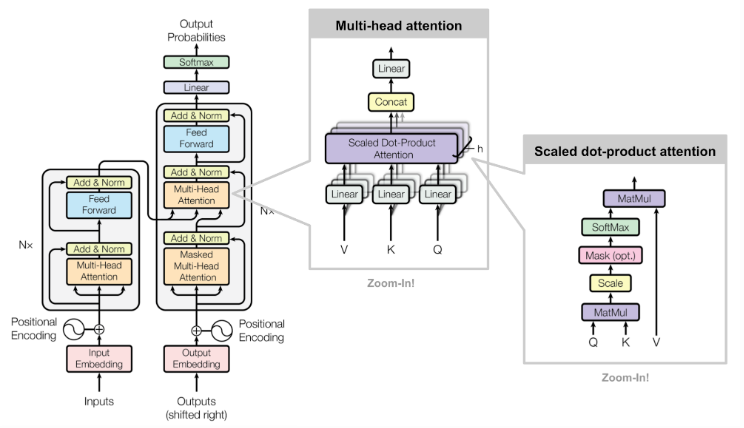<br>
        
* 챗봇의 병렬 데이터 받아오기
    * 학습에 사용할 데이터셋을 준비하는 과정을 수행합니다.
* 병렬 데이터 전처리하기
    * 준비된 데이터를 학습시키기 위해 전처리과정을 수행하며, 교사 강요에 대해서 학습니다.
* 모델 정의 및 학습하기
    * 트랜스포머 모델을 정의하고 훈련까지 수행합니다.
* 챗봇 테스트하기
    * 학습된 트랜스포머를 사용하여 테스트를 진행합니다.

In [1]:
import nltk
nltk.download('punkt')
from konlpy.tag import Okt
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 데이터 수집

In [2]:
path = os.getenv("HOME")+"/aiffel/transformer_chatbot/data/ChatbotData .csv"
data = pd.read_csv(path)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 11823


In [3]:
data.head

<bound method NDFrame.head of                              Q                         A  label
0                       12시 땡!                하루가 또 가네요.      0
1                  1지망 학교 떨어졌어                 위로해 드립니다.      0
2                 3박4일 놀러가고 싶다               여행은 언제나 좋죠.      0
3              3박4일 정도 놀러가고 싶다               여행은 언제나 좋죠.      0
4                      PPL 심하네                눈살이 찌푸려지죠.      0
...                        ...                       ...    ...
11818           훔쳐보는 것도 눈치 보임.        티가 나니까 눈치가 보이는 거죠!      2
11819           훔쳐보는 것도 눈치 보임.             훔쳐보는 거 티나나봐요.      2
11820              흑기사 해주는 짝남.                    설렜겠어요.      2
11821  힘든 연애 좋은 연애라는게 무슨 차이일까?  잘 헤어질 수 있는 사이 여부인 거 같아요.      2
11822               힘들어서 결혼할까봐        도피성 결혼은 하지 않길 바라요.      2

[11823 rows x 3 columns]>

## 데이터 전처리

#### 중복된 Question data가 있는지 확인

In [4]:
print('Q 열에서 중복을 배제한 유일한 샘플의 수 :', data['Q'].nunique())
print('A 열에서 중복을 배제한 유일한 샘플의 수 :', data['A'].nunique())

Q 열에서 중복을 배제한 유일한 샘플의 수 : 11662
A 열에서 중복을 배제한 유일한 샘플의 수 : 7779


In [5]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['Q'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 11662


#### 결측치가 있는지 확인

In [6]:
print(data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


결측치가 없습니다.

#### 텍스트 정규화와 불용어 제거

In [7]:
# 챗봇에서는 불용어를 제거하게 되면 대화의 자연스러움이 없어질 수 있기 때문에 
# 불용어 제거는 하지 않는 쪽으로 가도록 하겠습니다.
#불용어
stopwords = ['저','그','의', '가', '이', '은', '는', '을', '를', '에', '와', '과','도','로', '하다', '다','이다', '하다', '되다']

In [8]:
def preprocess_sentence(sentence, remove_stopwords=True):
    # 단어와 구두점 사이의 거리를 만들기
    sentence = re.sub(r"([?.!])", r" \1", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    # 특수문자 제거 (필요 없는 특수문자만 제거)
    sentence = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z?.!\s]", "", sentence)
    
    # 숫자와 문자 사이에 공백 추가
    sentence = re.sub(r'(\d)([a-zA-Z가-힣])', r'\1 \2', sentence)
    sentence = re.sub(r'([a-zA-Z가-힣])(\d)', r'\1 \2', sentence)
    
    return sentence


In [9]:
temp_Q = '오늘 6시에 행복한 일이 있을까?'
temp_A = '있을 것 같아!'

print("Question: ", preprocess_sentence(temp_Q))
print("Answer:", preprocess_sentence(temp_A, False))

Question:  오늘 6 시에 행복한 일이 있을까 ?
Answer: 있을 것 같아 !


In [10]:
data['Q'] = data['Q'].map(lambda x: preprocess_sentence(x, True))

In [11]:
data['A'] = data['A'].map(lambda x: preprocess_sentence(x, True))

In [12]:
print(data[:5])

                    Q             A  label
0            12 시 땡 !   하루가 또 가네요 .      0
1        1 지망 학교 떨어졌어    위로해 드립니다 .      0
2     3 박 4 일 놀러가고 싶다  여행은 언제나 좋죠 .      0
3  3 박 4 일 정도 놀러가고 싶다  여행은 언제나 좋죠 .      0
4             PPL 심하네   눈살이 찌푸려지죠 .      0


#### 사전만들기

In [13]:
# Make Vocabulary - using subwordTextEncoder
def makeVocabulary(data):
    tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    data, target_vocab_size=2**13)
    
    return tokenizer

In [14]:
tokenizer = makeVocabulary(data['Q']+data['A'])
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [15]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8281]
END_TOKEN의 번호 : [8282]


In [16]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8283


#### 각 단어를 고유한 정수로 인코드 & 패딩

Q의 최소 길이 : 1
Q의 최대 길이 : 16
Q의 평균 길이 : 3.97616189332876
A의 최소 길이 : 1
A의 최대 길이 : 24
A의 평균 길이 : 4.719945120905505


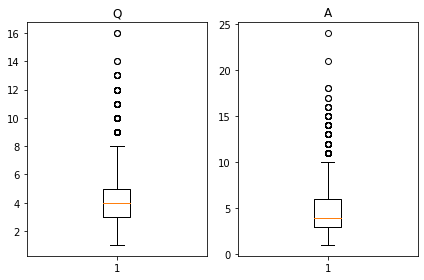

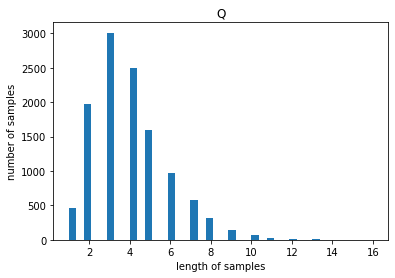

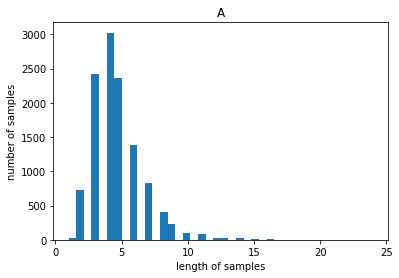

In [17]:
# 길이 분포 출력
import matplotlib.pyplot as plt

Q_len = [len(s.split()) for s in data['Q']]
A_len = [len(s.split()) for s in data['A']]

print('Q의 최소 길이 : {}'.format(np.min(Q_len)))
print('Q의 최대 길이 : {}'.format(np.max(Q_len)))
print('Q의 평균 길이 : {}'.format(np.mean(Q_len)))
print('A의 최소 길이 : {}'.format(np.min(A_len)))
print('A의 최대 길이 : {}'.format(np.max(A_len)))
print('A의 평균 길이 : {}'.format(np.mean(A_len)))

plt.subplot(1,2,1)
plt.boxplot(Q_len)
plt.title('Q')
plt.subplot(1,2,2)
plt.boxplot(A_len)
plt.title('A')
plt.tight_layout()
plt.show()

plt.title('Q')
plt.hist(Q_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('A')
plt.hist(A_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
MAX_LENGTH = 20

# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    for (sentence1, sentence2) in zip(inputs, outputs):
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        # 최대 길이 12 이하인 경우에만 데이터셋으로 허용
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
  # 최대 길이 12으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
    return tokenized_inputs, tokenized_outputs

In [19]:
print(len(data['Q']))
print(len(data['A']))

11662
11662


In [20]:
Q, A = tokenize_and_filter(data['Q'], data['A'])
print(Q[:5])
print(A[:5])
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(Q)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(A)))

[[8281 8022 1228 3039   38 8282    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [8281  164   50 1023 8057  984 1898 8282    0    0    0    0    0    0
     0    0    0    0    0    0]
 [8281  189 2989  458   84 3617   78 8282    0    0    0    0    0    0
     0    0    0    0    0    0]
 [8281  189 2989  458   84 1383 3617   78 8282    0    0    0    0    0
     0    0    0    0    0    0]
 [8281 8105 8105 8101 8057 4174 8282    0    0    0    0    0    0    0
     0    0    0    0    0    0]]
[[8281 3805   73 8013    1 8282    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [8281 1827 5507    1 8282    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [8281 3362  774  127    1 8282    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [8281 3362  774  127    1 8282    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [8281 1094 2280 1484 2166 5473   44    1 8282    0   

In [21]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': Q,
        'dec_inputs': A[:, :-1]
    },
    {
        'outputs': A[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


## 모델 구성

### 포지셔널 인코딩

In [22]:
# 포지셔널 인코딩 레이어

# TensorFlow 환경 초기화
tf.keras.backend.clear_session()

class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # 각도 배열 생성
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)
        # pos_encoding = tf.concat([sines,cosines], axis = -1)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]



### Scaled Dot Product Attention (유사도를 구하기)

In [23]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)

  # softmax적용
    attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output


### Multi-Head Attention (Encoder-Decoder Attention)

In [24]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용합니다
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        outputs = self.dense(concat_attention)

        return outputs

### Padding Masking Code
 패딩 마스킹을 참고하면 불필요하게 숫자 0을 참고하지 않게 할 수 있음

In [25]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

### Look Ahead Masking

In [26]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

### Encoding Code<br>
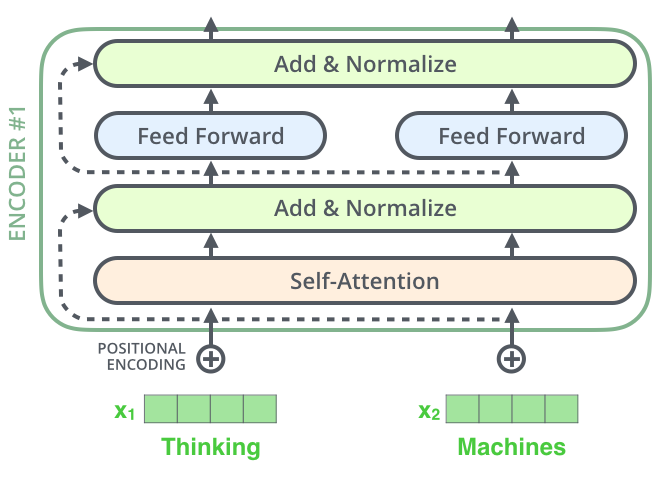

In [27]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층 (feedforward)
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)


#### 임베딩 층과 포지셔널 인코딩을 연결하고 원하는 만큼의 인코더 층을 쌓아 트랜스포머의 인코더 만들기

In [28]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)


### Decoder Code

In [29]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

#### 임베딩층과 포지셔널 인코딩을 연결하고 원하는 만큼의 층을 쌓아 만든 트랜스포머 디코더

In [30]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        
        outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

#### 트랜스포머 함수 만들기

In [31]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
    enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
    dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

##### Transformer 모델 Summary

In [160]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3174656     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [101]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 6 # 인코더와 디코더의 층의 개수 # 논문에서는 6개의 층으로 해봤다고 함.
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model2 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model2.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    5283072     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [120]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 4 # 인코더와 디코더의 층의 개수 # 논문에서는 6개의 층으로 해봤다고 함.
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model3 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model3.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    4228864     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [136]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2  # 인코더와 디코더의 층의 개수
D_MODEL = 512  # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8  # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 2048  # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1  # 드롭아웃의 비율

model4 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model4.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    10545664    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [168]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 4  # 인코더와 디코더의 층의 개수
D_MODEL = 512  # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8  # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 2048  # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1  # 드롭아웃의 비율

model5 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model5.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    16850432    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [169]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 6  # 인코더와 디코더의 층의 개수
D_MODEL = 512  # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8  # 멀티 헤드 어텐션에서의 헤드 수
UNITS = 2048  # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1  # 드롭아웃의 비율

model6 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model6.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    23155200    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

#### 손실함수

In [121]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

#### 커스텀 된 학습률 (Learning rate)

In [122]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

#### 학습률 스케줄링 계획을 시각화하기

Text(0.5, 0, 'Train Step')

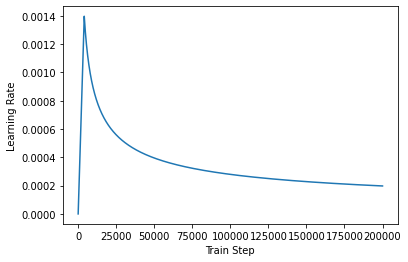

In [123]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

#### 모델 컴파일링

In [161]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [90]:
EPOCHS = 50
history1 = model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/50
182/182 [==============================] - 12s 37ms/step - loss: 2.9966 - accuracy: 0.0465
Epoch 2/50
182/182 [==============================] - 7s 36ms/step - loss: 2.4408 - accuracy: 0.1017
Epoch 3/50
182/182 [==============================] - 7s 36ms/step - loss: 2.0633 - accuracy: 0.1046
Epoch 4/50
182/182 [==============================] - 7s 36ms/step - loss: 1.9066 - accuracy: 0.1116
Epoch 5/50
182/182 [==============================] - 7s 37ms/step - loss: 1.7902 - accuracy: 0.1180
Epoch 6/50
182/182 [==============================] - 7s 37ms/step - loss: 1.6713 - accuracy: 0.1262
Epoch 7/50
182/182 [==============================] - 7s 37ms/step - loss: 1.5416 - accuracy: 0.1369
Epoch 8/50
182/182 [==============================] - 7s 37ms/step - loss: 1.3948 - accuracy: 0.1523
Epoch 9/50
182/182 [==============================] - 7s 37ms/step - loss: 1.2352 - accuracy: 0.1706
Epoch 10/50
182/182 [==============================] - 7s 37ms/step - loss: 1.0681 - accur

In [162]:
EPOCHS = 100
history2 = model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
182/182 [==============================] - 12s 37ms/step - loss: 2.9675 - accuracy: 0.0577
Epoch 2/100
182/182 [==============================] - 7s 37ms/step - loss: 2.4153 - accuracy: 0.1017
Epoch 3/100
182/182 [==============================] - 7s 37ms/step - loss: 2.0600 - accuracy: 0.1041
Epoch 4/100
182/182 [==============================] - 7s 37ms/step - loss: 1.9061 - accuracy: 0.1118
Epoch 5/100
182/182 [==============================] - 7s 37ms/step - loss: 1.7894 - accuracy: 0.1178
Epoch 6/100
182/182 [==============================] - 7s 37ms/step - loss: 1.6691 - accuracy: 0.1263
Epoch 7/100
182/182 [==============================] - 7s 37ms/step - loss: 1.5368 - accuracy: 0.1387
Epoch 8/100
182/182 [==============================] - 7s 37ms/step - loss: 1.3903 - accuracy: 0.1539
Epoch 9/100
182/182 [==============================] - 7s 37ms/step - loss: 1.2331 - accuracy: 0.1710
Epoch 10/100
182/182 [==============================] - 7s 37ms/step - loss: 1.06

In [105]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model2.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [107]:
EPOCHS = 100
history3 = model2.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
182/182 [==============================] - 31s 80ms/step - loss: 2.9572 - accuracy: 0.0437
Epoch 2/100
182/182 [==============================] - 15s 81ms/step - loss: 2.4432 - accuracy: 0.0872
Epoch 3/100
182/182 [==============================] - 14s 79ms/step - loss: 2.0919 - accuracy: 0.1029
Epoch 4/100
182/182 [==============================] - 15s 80ms/step - loss: 1.9562 - accuracy: 0.1061
Epoch 5/100
182/182 [==============================] - 15s 80ms/step - loss: 1.8831 - accuracy: 0.1106
Epoch 6/100
182/182 [==============================] - 15s 80ms/step - loss: 1.8167 - accuracy: 0.1147
Epoch 7/100
182/182 [==============================] - 15s 80ms/step - loss: 1.7492 - accuracy: 0.1180
Epoch 8/100
182/182 [==============================] - 15s 80ms/step - loss: 1.6750 - accuracy: 0.1221
Epoch 9/100
182/182 [==============================] - 14s 79ms/step - loss: 1.5915 - accuracy: 0.1272
Epoch 10/100
182/182 [==============================] - 15s 80ms/step - l

In [124]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model3.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [125]:
EPOCHS = 100
history4 = model3.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
182/182 [==============================] - 21s 60ms/step - loss: 2.9791 - accuracy: 0.0440
Epoch 2/100
182/182 [==============================] - 11s 60ms/step - loss: 2.4299 - accuracy: 0.1015
Epoch 3/100
182/182 [==============================] - 11s 59ms/step - loss: 2.0718 - accuracy: 0.1034
Epoch 4/100
182/182 [==============================] - 11s 59ms/step - loss: 1.9290 - accuracy: 0.1103
Epoch 5/100
182/182 [==============================] - 11s 59ms/step - loss: 1.8283 - accuracy: 0.1157
Epoch 6/100
182/182 [==============================] - 11s 58ms/step - loss: 1.7351 - accuracy: 0.1204
Epoch 7/100
182/182 [==============================] - 11s 58ms/step - loss: 1.6291 - accuracy: 0.1275
Epoch 8/100
182/182 [==============================] - 11s 59ms/step - loss: 1.5139 - accuracy: 0.1374
Epoch 9/100
182/182 [==============================] - 11s 59ms/step - loss: 1.3832 - accuracy: 0.1499
Epoch 10/100
182/182 [==============================] - 11s 59ms/step - l

In [137]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model4.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [138]:
EPOCHS = 100
history5 = model4.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
182/182 [==============================] - 18s 66ms/step - loss: 2.7234 - accuracy: 0.0744
Epoch 2/100
182/182 [==============================] - 12s 66ms/step - loss: 2.1608 - accuracy: 0.1026
Epoch 3/100
182/182 [==============================] - 12s 66ms/step - loss: 1.9563 - accuracy: 0.1105
Epoch 4/100
182/182 [==============================] - 12s 67ms/step - loss: 1.8112 - accuracy: 0.1182
Epoch 5/100
182/182 [==============================] - 12s 67ms/step - loss: 1.6595 - accuracy: 0.1286
Epoch 6/100
182/182 [==============================] - 12s 67ms/step - loss: 1.4966 - accuracy: 0.1441
Epoch 7/100
182/182 [==============================] - 12s 67ms/step - loss: 1.3193 - accuracy: 0.1637
Epoch 8/100
182/182 [==============================] - 12s 67ms/step - loss: 1.1302 - accuracy: 0.1862
Epoch 9/100
182/182 [==============================] - 12s 68ms/step - loss: 0.9315 - accuracy: 0.2121
Epoch 10/100
182/182 [==============================] - 12s 68ms/step - l

In [170]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model5.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [171]:
EPOCHS = 100
history6 = model5.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
182/182 [==============================] - 32s 113ms/step - loss: 2.7114 - accuracy: 0.0617
Epoch 2/100
182/182 [==============================] - 21s 114ms/step - loss: 2.1569 - accuracy: 0.1026
Epoch 3/100
182/182 [==============================] - 21s 116ms/step - loss: 1.9738 - accuracy: 0.1094
Epoch 4/100
182/182 [==============================] - 21s 118ms/step - loss: 1.8594 - accuracy: 0.1159
Epoch 5/100
182/182 [==============================] - 21s 117ms/step - loss: 1.7319 - accuracy: 0.1233
Epoch 6/100
182/182 [==============================] - 21s 115ms/step - loss: 1.5889 - accuracy: 0.1342
Epoch 7/100
182/182 [==============================] - 21s 116ms/step - loss: 1.4342 - accuracy: 0.1494
Epoch 8/100
182/182 [==============================] - 21s 116ms/step - loss: 1.2684 - accuracy: 0.1689
Epoch 9/100
182/182 [==============================] - 21s 116ms/step - loss: 1.1026 - accuracy: 0.1895
Epoch 10/100
182/182 [==============================] - 21s 115m

In [186]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model6.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [187]:
EPOCHS = 100
history7 = model6.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
182/182 [==============================] - 46s 163ms/step - loss: 2.7208 - accuracy: 0.0576
Epoch 2/100
182/182 [==============================] - 30s 163ms/step - loss: 2.1760 - accuracy: 0.1024
Epoch 3/100
182/182 [==============================] - 29s 162ms/step - loss: 1.9954 - accuracy: 0.1056
Epoch 4/100
182/182 [==============================] - 30s 162ms/step - loss: 1.9020 - accuracy: 0.1115
Epoch 5/100
182/182 [==============================] - 30s 162ms/step - loss: 1.8193 - accuracy: 0.1161
Epoch 6/100
182/182 [==============================] - 30s 162ms/step - loss: 1.7354 - accuracy: 0.1206
Epoch 7/100
182/182 [==============================] - 29s 162ms/step - loss: 1.6362 - accuracy: 0.1270
Epoch 8/100
182/182 [==============================] - 30s 162ms/step - loss: 1.5262 - accuracy: 0.1352
Epoch 9/100
182/182 [==============================] - 30s 162ms/step - loss: 1.4065 - accuracy: 0.1463
Epoch 10/100
182/182 [==============================] - 29s 162m

## 모델 평가

### decoder inference 

In [108]:
def decoder_inference(sentence, mod):
    sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)
    
  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = mod(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]
    # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)
    
    return tf.squeeze(output_sequence, axis=0)

### 챗봇의 대답을 얻는 함수

In [109]:
def sentence_generation(sentence, mod):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence, mod)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])
    
    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

Max_length: 20, Epoch: 50, NUM_LAYER = 2, D_MODEL = 256, UNITS = 512

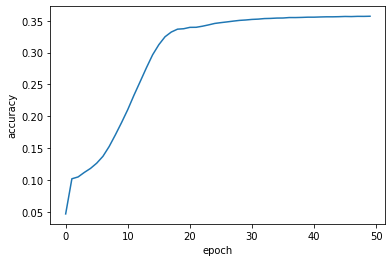

In [92]:
plt.plot(history1.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [61]:
sentence_generation('12시 땡!')

입력 : 12시 땡!
출력 : 하루가 또 가네요 .


'하루가 또 가네요 .'

In [62]:
sentence_generation('1 지망 학교 떨어졌어')

입력 : 1 지망 학교 떨어졌어
출력 : 위로해 드립니다 .


'위로해 드립니다 .'

In [63]:
sentence_generation('저녁에 뭐 먹을까?')

입력 : 저녁에 뭐 먹을까?
출력 : 한 번만 더 연락해보는 건 어떨까요 .


'한 번만 더 연락해보는 건 어떨까요 .'

In [64]:
sentence_generation('프로젝트를 성공적으로 완성시킬 수 있을까?')

입력 : 프로젝트를 성공적으로 완성시킬 수 있을까?
출력 : 성공적으로 끝날 거예요 .


'성공적으로 끝날 거예요 .'

In [65]:
sentence_generation('안녕?')

입력 : 안녕?
출력 : 안녕하세요 .


'안녕하세요 .'

In [66]:
sentence_generation('배고파')

입력 : 배고파
출력 : 얼른 맛난 음식 드세요 .


'얼른 맛난 음식 드세요 .'

In [67]:
sentence_generation('우리 3시에 만날까?')

입력 : 우리 3시에 만날까?
출력 : 더 좋은 사람 만나서 하세요 .


'더 좋은 사람 만나서 하세요 .'

In [57]:
sentence_generation('타코야끼가 너무 먹고싶어')

tf.Tensor([[8281  318 1202  108 2684   26    6 4361   51 8282]], shape=(1, 10), dtype=int32)
입력 : 타코야끼가 너무 먹고싶어
출력 : 엄청난 용기가 필요하겠네요 .


'엄청난 용기가 필요하겠네요 .'

In [58]:
sentence_generation('워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?')

tf.Tensor(
[[8281  861 1115 3499  405  223 1510  123 6701   41 8016  162   14 7828
  8057  283 3741   96    2 8282]], shape=(1, 20), dtype=int32)
입력 : 워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?
출력 : 사랑으로 이어질 수도 있어요 .


'사랑으로 이어질 수도 있어요 .'

'저녁에 뭐 먹을까?'라는 질문에 '한 번만 더 연락해보는 건 어떨까요.'라는 답이 나오고, '타코야끼가 너무 먹고싶어'라고 했을때 '엄청난 용기가 필요하겠네요'라는 답변이라던지 '우리 3시에 만날까?에 대한 답변으로 '더 좋은 사람 만나서 하세요'라는 답변이 제법 어색해 보인다.
<br>
Epoch를 100까지 한번 올려서 해보고자 한다.

Max_length: 20, Epoch: 100, NUM_LAYER = 2, D_MODEL = 256, UNITS = 512

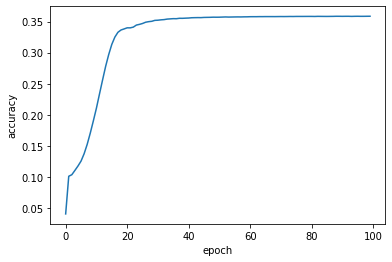

In [99]:
plt.plot(history2.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [76]:
sentence_generation('12시 땡!')

입력 : 12시 땡!
출력 : 하루가 또 가네요 .


'하루가 또 가네요 .'

In [77]:
sentence_generation('1 지망 학교 떨어졌어')

입력 : 1 지망 학교 떨어졌어
출력 : 위로해 드립니다 .


'위로해 드립니다 .'

In [78]:
sentence_generation('저녁에 뭐 먹을까?')

입력 : 저녁에 뭐 먹을까?
출력 : 한 번만 더 연락해보는 건 어떨까요 .


'한 번만 더 연락해보는 건 어떨까요 .'

In [79]:
sentence_generation('프로젝트를 성공적으로 완성시킬 수 있을까?')

입력 : 프로젝트를 성공적으로 완성시킬 수 있을까?
출력 : 성공적으로 끝날 거예요 .


'성공적으로 끝날 거예요 .'

In [80]:
sentence_generation('안녕?')

입력 : 안녕?
출력 : 안녕하세요 .


'안녕하세요 .'

In [81]:
sentence_generation('배고파')

입력 : 배고파
출력 : 얼른 맛난 음식 드세요 .


'얼른 맛난 음식 드세요 .'

In [82]:
sentence_generation('우리 3시에 만날까?')

입력 : 우리 3시에 만날까?
출력 : 더 좋은 사람 만나실 거예요 .


'더 좋은 사람 만나실 거예요 .'

In [83]:
sentence_generation('타코야끼가 너무 먹고싶어')

입력 : 타코야끼가 너무 먹고싶어
출력 : 그만큼 사랑했던 시간이 있으니까요 .


'그만큼 사랑했던 시간이 있으니까요 .'

In [84]:
sentence_generation('워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?')

입력 : 워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?
출력 : 저에게 기대세요 .


'저에게 기대세요 .'

In [163]:
sentence_generation('공부하기 싫어', model)

입력 : 공부하기 싫어
출력 : 잠시 쉬어도 돼요 .


'잠시 쉬어도 돼요 .'

In [164]:
sentence_generation('토요일에 뭐해?', model)

입력 : 토요일에 뭐해?
출력 : 헤아릴 수 없는 것 .


'헤아릴 수 없는 것 .'

In [165]:
sentence_generation('놀러가고 싶어. 장소 추천해줘.', model)

입력 : 놀러가고 싶어. 장소 추천해줘.
출력 : 혼자도 좋아요 .


'혼자도 좋아요 .'

Epoch이 50이었을때는 '우리 3시에 만날까?' 라는 질문에 대한 답으로 '더 좋은 사람 만나서 하세요' 가 나와 부자연스러웠습니다. 이후 Epoch을 100으로 늘리니까 '우리 3시에 만날까?' 라고 했을때 답을 '더 좋은 사람 만나실 거예요.' 라고 하여 Epoch 수를 작게 했을 때보다는 자연스러운 답을 낼 수 있었습니다.

Max_length: 20, Epoch: 100, layer_number: 6, D_MODEL = 256, UNITS = 512

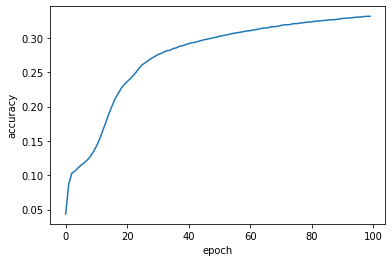

In [110]:
plt.plot(history3.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [111]:
sentence_generation('12시 땡!', model2)

입력 : 12시 땡!
출력 : 하루가 또 가네요 .


'하루가 또 가네요 .'

In [112]:
sentence_generation('1 지망 학교 떨어졌어', model2)

입력 : 1 지망 학교 떨어졌어
출력 : 위로해 드립니다 .


'위로해 드립니다 .'

In [113]:
sentence_generation('저녁에 뭐 먹을까?', model2)

입력 : 저녁에 뭐 먹을까?
출력 : 말해보세요 .


'말해보세요 .'

In [114]:
sentence_generation('프로젝트를 성공적으로 완성시킬 수 있을까?', model2)

입력 : 프로젝트를 성공적으로 완성시킬 수 있을까?
출력 : 여기만 아니면 다 좋을 것 같네요 .


'여기만 아니면 다 좋을 것 같네요 .'

In [115]:
sentence_generation('안녕?', model2)

입력 : 안녕?
출력 : 타이밍이 안 맞았나봐요 .


'타이밍이 안 맞았나봐요 .'

In [116]:
sentence_generation('배고파', model2)

입력 : 배고파
출력 : 얼른 맛난 음식 드세요 .


'얼른 맛난 음식 드세요 .'

In [117]:
sentence_generation('우리 3시에 만날까?', model2)

입력 : 우리 3시에 만날까?
출력 : 공동육아가 기본인데요 .


'공동육아가 기본인데요 .'

In [201]:
sentence_generation('타코야끼가 너무 먹고싶어', model2)

입력 : 타코야끼가 너무 먹고싶어
출력 : 방해가 될 수도 있지만 옆에서 응원해주면 든든든든든든든든든든든든


'방해가 될 수도 있지만 옆에서 응원해주면 든든든든든든든든든든든든'

In [119]:
sentence_generation('워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?', model2)

입력 : 워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?
출력 : 깊은 곳까지 가지 말고 주의하세요 .


'깊은 곳까지 가지 말고 주의하세요 .'

In [156]:
sentence_generation('공부하기 싫어', model2)

입력 : 공부하기 싫어
출력 : 잠시 쉬어도 돼요 .


'잠시 쉬어도 돼요 .'

In [157]:
sentence_generation('토요일에 뭐해?', model2)

입력 : 토요일에 뭐해?
출력 : 이름 직업 등 말고 온전히 자신으로 사는 거죠 .


'이름 직업 등 말고 온전히 자신으로 사는 거죠 .'

In [158]:
sentence_generation('놀러가고 싶어. 장소 추천해줘.', model2)

입력 : 놀러가고 싶어. 장소 추천해줘.
출력 : 강가 같이 분위기 있는 곳이 좋겠어요 .


'강가 같이 분위기 있는 곳이 좋겠어요 .'

Max_length: 20, Epoch: 100, layer_number: 4, D_MODEL = 256, UNITS = 512

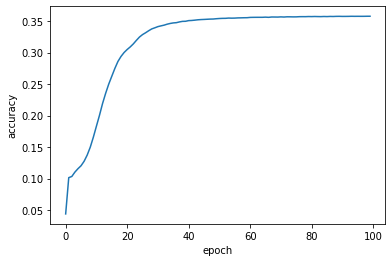

In [126]:
plt.plot(history4.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [127]:
sentence_generation('12시 땡!', model3)

입력 : 12시 땡!
출력 : 하루가 또 가네요 .


'하루가 또 가네요 .'

In [128]:
sentence_generation('1 지망 학교 떨어졌어', model3)

입력 : 1 지망 학교 떨어졌어
출력 : 위로해 드립니다 .


'위로해 드립니다 .'

In [129]:
sentence_generation('저녁에 뭐 먹을까?', model3)

입력 : 저녁에 뭐 먹을까?
출력 : 한 번만 더 연락해보는 건 어떨까요 .


'한 번만 더 연락해보는 건 어떨까요 .'

In [130]:
sentence_generation('프로젝트를 성공적으로 완성시킬 수 있을까?', model3)

입력 : 프로젝트를 성공적으로 완성시킬 수 있을까?
출력 : 성공적으로 끝날 거예요 .


'성공적으로 끝날 거예요 .'

In [131]:
sentence_generation('안녕?', model3)

입력 : 안녕?
출력 : 안녕하세요 .


'안녕하세요 .'

In [132]:
sentence_generation('배고파', model3)

입력 : 배고파
출력 : 얼른 맛난 음식 드세요 .


'얼른 맛난 음식 드세요 .'

In [133]:
sentence_generation('우리 3시에 만날까?', model3)

입력 : 우리 3시에 만날까?
출력 : 같은 해내고 해보세요 .


'같은 해내고 해보세요 .'

In [134]:
sentence_generation('타코야끼가 너무 먹고싶어', model3)

입력 : 타코야끼가 너무 먹고싶어
출력 : 눈 체조를 해보세요 .


'눈 체조를 해보세요 .'

In [135]:
sentence_generation('워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?', model3)

입력 : 워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?
출력 : 그런 않나봐요 .


'그런 않나봐요 .'

In [153]:
sentence_generation('공부하기 싫어', model3)

입력 : 공부하기 싫어
출력 : 잠시 쉬어도 돼요 .


'잠시 쉬어도 돼요 .'

In [154]:
sentence_generation('토요일에 뭐해?', model3)

입력 : 토요일에 뭐해?
출력 : 혼자하는 것도 같아요 .


'혼자하는 것도 같아요 .'

In [155]:
sentence_generation('놀러가고 싶어. 장소 추천해줘.', model3)

입력 : 놀러가고 싶어. 장소 추천해줘.
출력 : 여행은 언제나 좋죠 .


'여행은 언제나 좋죠 .'

Max_length: 20, Epoch: 100, layer_number: 2, D_MODEL = 512, UNITS = 2048

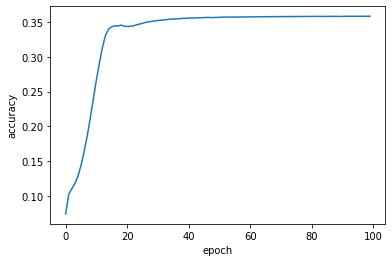

In [139]:
plt.plot(history5.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [140]:
sentence_generation('12시 땡!', model4)

입력 : 12시 땡!
출력 : 하루가 또 가네요 .


'하루가 또 가네요 .'

In [141]:
sentence_generation('1 지망 학교 떨어졌어', model4)

입력 : 1 지망 학교 떨어졌어
출력 : 위로해 드립니다 .


'위로해 드립니다 .'

In [142]:
sentence_generation('저녁에 뭐 먹을까?', model4)

입력 : 저녁에 뭐 먹을까?
출력 : 한 번만 더 연락해보는 건 어떨까요 .


'한 번만 더 연락해보는 건 어떨까요 .'

In [143]:
sentence_generation('프로젝트를 성공적으로 완성시킬 수 있을까?', model4)

입력 : 프로젝트를 성공적으로 완성시킬 수 있을까?
출력 : 성공적으로 끝날 거예요 .


'성공적으로 끝날 거예요 .'

In [144]:
sentence_generation('안녕?', model4)

입력 : 안녕?
출력 : 안녕하세요 .


'안녕하세요 .'

In [145]:
sentence_generation('배고파', model4)

입력 : 배고파
출력 : 얼른 맛난 음식 드세요 .


'얼른 맛난 음식 드세요 .'

In [146]:
sentence_generation('우리 3시에 만날까?', model4)

입력 : 우리 3시에 만날까?
출력 : 많이 그리운가봐요 .


'많이 그리운가봐요 .'

In [147]:
sentence_generation('타코야끼가 너무 먹고싶어', model4)

입력 : 타코야끼가 너무 먹고싶어
출력 : 기분이 좀 풀렸길 바랍니다 .


'기분이 좀 풀렸길 바랍니다 .'

In [148]:
sentence_generation('워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?', model4)

입력 : 워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?
출력 : 저는 위로봇입니다 .


'저는 위로봇입니다 .'

In [149]:
sentence_generation('공부하기 싫어', model4)

입력 : 공부하기 싫어
출력 : 잠시 쉬어도 돼요 .


'잠시 쉬어도 돼요 .'

In [150]:
sentence_generation('토요일에 뭐해?', model4)

입력 : 토요일에 뭐해?
출력 : 서로에게 부담 없는 작은 선물이 좋아요 .


'서로에게 부담 없는 작은 선물이 좋아요 .'

In [151]:
sentence_generation('놀러가고 싶어. 장소 추천해줘.', model4)

입력 : 놀러가고 싶어. 장소 추천해줘.
출력 : 탁 트인 바다 좋죠 !


'탁 트인 바다 좋죠 !'

Max_length: 20, Epoch: 100, layer_number: 4, D_MODEL = 512, UNITS = 2048

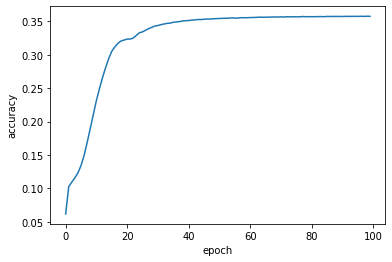

In [172]:
plt.plot(history6.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [173]:
sentence_generation('12시 땡!', model5)

입력 : 12시 땡!
출력 : 하루가 또 가네요 .


'하루가 또 가네요 .'

In [174]:
sentence_generation('1 지망 학교 떨어졌어', model5)

입력 : 1 지망 학교 떨어졌어
출력 : 위로해 드립니다 .


'위로해 드립니다 .'

In [175]:
sentence_generation('저녁에 뭐 먹을까?', model5)

입력 : 저녁에 뭐 먹을까?
출력 : 한 번만 더 연락해보는 건 어떨까요 .


'한 번만 더 연락해보는 건 어떨까요 .'

In [176]:
sentence_generation('프로젝트를 성공적으로 완성시킬 수 있을까?', model5)

입력 : 프로젝트를 성공적으로 완성시킬 수 있을까?
출력 : 성공적으로 끝날 거예요 .


'성공적으로 끝날 거예요 .'

In [178]:
sentence_generation('안녕?', model5)

입력 : 안녕?
출력 : 안녕하세요 .


'안녕하세요 .'

In [179]:
sentence_generation('배고파', model5)

입력 : 배고파
출력 : 얼른 맛난 음식 드세요 .


'얼른 맛난 음식 드세요 .'

In [180]:
sentence_generation('우리 3시에 만날까?', model5)

입력 : 우리 3시에 만날까?
출력 : 차단하고 살아요 .


'차단하고 살아요 .'

In [181]:
sentence_generation('타코야끼가 너무 먹고싶어', model5)

입력 : 타코야끼가 너무 먹고싶어
출력 : 정열적인 사랑을 하고 있나봐요 .


'정열적인 사랑을 하고 있나봐요 .'

In [182]:
sentence_generation('워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?', model5)

입력 : 워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?
출력 : 마음이랑 머리가 따로 없죠 .


'마음이랑 머리가 따로 없죠 .'

In [183]:
sentence_generation('공부하기 싫어', model5)

입력 : 공부하기 싫어
출력 : 잠시 쉬어도 돼요 .


'잠시 쉬어도 돼요 .'

In [184]:
sentence_generation('토요일에 뭐해?', model5)

입력 : 토요일에 뭐해?
출력 : 지금 잘할 수 있을 거예요 .


'지금 잘할 수 있을 거예요 .'

In [185]:
sentence_generation('놀러가고 싶어. 장소 추천해줘.', model5)

입력 : 놀러가고 싶어. 장소 추천해줘.
출력 : 놀러가세요 !


'놀러가세요 !'

Max_length: 20, Epoch: 100, layer_number: 6, D_MODEL = 512, UNITS = 2048

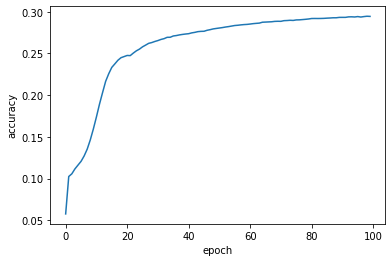

In [188]:
plt.plot(history7.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [189]:
sentence_generation('12시 땡!', model6)

입력 : 12시 땡!
출력 : 집에서 쉬는 시간도 필요해요 .


'집에서 쉬는 시간도 필요해요 .'

In [190]:
sentence_generation('1 지망 학교 떨어졌어', model6)

입력 : 1 지망 학교 떨어졌어
출력 : 괜찮아지고 있어 다행이에요 .


'괜찮아지고 있어 다행이에요 .'

In [191]:
sentence_generation('저녁에 뭐 먹을까?', model6)

입력 : 저녁에 뭐 먹을까?
출력 : 사람 마음은 알다가도 모르니까 그럴 수 있어요 .


'사람 마음은 알다가도 모르니까 그럴 수 있어요 .'

In [192]:
sentence_generation('프로젝트를 성공적으로 완성시킬 수 있을까?', model6)

입력 : 프로젝트를 성공적으로 완성시킬 수 있을까?
출력 : 살짝 내려보는것도 괜찮을거 같아요 .


'살짝 내려보는것도 괜찮을거 같아요 .'

In [193]:
sentence_generation('안녕?', model6)

입력 : 안녕?
출력 : 맛있게 드세요 .


'맛있게 드세요 .'

In [194]:
sentence_generation('배고파', model6)

입력 : 배고파
출력 : 얼른 뭐라도 드세요 .


'얼른 뭐라도 드세요 .'

In [195]:
sentence_generation('우리 3시에 만날까?', model6)

입력 : 우리 3시에 만날까?
출력 : 아니에요 . 너무 자책하지 마세요 .


'아니에요 . 너무 자책하지 마세요 .'

In [196]:
sentence_generation('타코야끼가 너무 먹고싶어', model6)

입력 : 타코야끼가 너무 먹고싶어
출력 : 더 많이 연락하고 관심을 가져주세요 .


'더 많이 연락하고 관심을 가져주세요 .'

In [197]:
sentence_generation('워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?', model6)

입력 : 워터밤에 갈 생각이 없었는데 어쩌다 가기로 했어. 근데 꼭 가야할까?
출력 : 당장 내일 일도 예측할 수 없는걸요 .


'당장 내일 일도 예측할 수 없는걸요 .'

In [198]:
sentence_generation('공부하기 싫어', model6)

입력 : 공부하기 싫어
출력 : 더 많이 연락하고 관심을 가져주세요 .


'더 많이 연락하고 관심을 가져주세요 .'

In [199]:
sentence_generation('토요일에 뭐해?', model6)

입력 : 토요일에 뭐해?
출력 : 먼저 사람들이랑 연락해서 놀러 가는 건 어때요 ?


'먼저 사람들이랑 연락해서 놀러 가는 건 어때요 ?'

In [200]:
sentence_generation('놀러가고 싶어. 장소 추천해줘.', model6)

입력 : 놀러가고 싶어. 장소 추천해줘.
출력 : 저도 부러워요 .


'저도 부러워요 .'

Max_length: 20, Epoch: 50, layer_number: 2, D_MODEL = 256, UNITS = 512<br>
Max_length: 20, Epoch: 100, layer_number: 2, D_MODEL = 256, UNITS = 512<br>
Max_length: 20, Epoch: 100, layer_number: 6, D_MODEL = 256, UNITS = 512<br>
Max_length: 20, Epoch: 100, layer_number: 4, D_MODEL = 256, UNITS = 512<br>
Max_length: 20, Epoch: 100, layer_number: 2, D_MODEL = 512, UNITS = 2048<br>
Max_length: 20, Epoch: 100, layer_number: 4, D_MODEL = 512, UNITS = 2048<br>
Max_length: 20, Epoch: 100, layer_number: 6, D_MODEL = 512, UNITS = 2048<br>
총 7가지의 모델을 사용해보았다. 그 중 <br>
Max_length: 20, Epoch: 100, layer_number: 2, D_MODEL = 256, UNITS = 512 이 가장 좋은 loss: 0.0023 - accuracy: 0.3584을 얻었지만 직접 답을 얻는 과정에서 다른 모델에서 더 좋은 결과를 얻는 경우도 있었다.<br>
Max_length: 20, Epoch: 100, <b>layer_number: 2</b>, D_MODEL = 256, UNITS = 512에서의 질문과 답변<br>
![Max_length: 20, Epoch: 100, layer_number: 2, D_MODEL = 256, UNITS = 512](model1놀러가고싶어.png)<br>
Max_length: 20, Epoch: 100, <b>layer_number: 6</b>, D_MODEL = 256, UNITS = 512 에서의 질문과 답변<br>
![Max_length: 20, Epoch: 100, layer_number: 6, D_MODEL = 256, UNITS = 512](model2놀러가고싶어.png)<br>
Max_length: 20, Epoch: 100, <b>layer_number: 2</b>, D_MODEL = 256, UNITS = 512에서의 loss값과 accuracy값이 훨씬 낮았지만 더 나은 답변을 받아냈다.<br>
Max_length: 20, Epoch: 100, <b>layer_number: 2, D_MODEL = 256, UNITS = 512</b> 에서의 질문과 답변<br>
![Max_length: 20, Epoch: 100, layer_number: 2, D_MODEL = 256, UNITS = 512](model1토요일에뭐해.png)<br>
Max_length: 20, Epoch: 100, <b>layer_number: 6, D_MODEL = 512, UNITS = 2048</b> 에서의 질문과 답변<br>
![Max_length: 20, Epoch: 100, layer_number: 6, D_MODEL = 512, UNITS = 2048](model6토요일에뭐해.png)<br>
Max_length: 20, Epoch: 100, <b>layer_number: 6, D_MODEL = 512, UNITS = 2048</b>에서의 loss값과 accuracy값이 훨씬 낮았지만 더 나은 답변을 받아냈다.

이것들을 제외하고는 Max_length: 20, Epoch: 100, layer_number: 2, D_MODEL = 256, UNITS = 512이 가장 좋은 답변을 받아냈다.